# Inverse Laplacian and the Heat Kernel

The heat kernel, also known as the RBF kernel, provides a similarity metric between all pairs of points in a given dataset. It is motivated as a measurement of the degree to which heat at one point will diffuse to another. 

From the perspective of PDEs, the heat kernel is a Green's Function of the heat differential operator, so we may identify it with a pseudoinverse. Because the heat PDE is governed by the Laplacian, the heat kernel is the pseudoinverse of the Laplacian. Taking a low rank approximation of the heat kernel amounts to preserving the bottom eigenvectors of the Laplacian matrix.

In this notebook, we visualize a graph Laplacian and its pseudoinverse.

In [3]:
from lib.spectral_clustering import spectral_clustering, laplacian_matrix, similarity_matrix
from lib.datasets import gaussian_mixture
from lib.kmeans import kmeans
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib import cm
from tqdm import tqdm

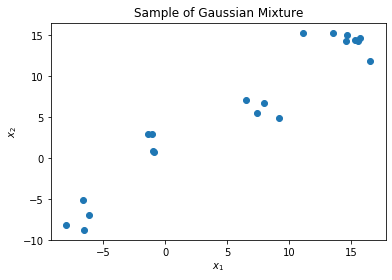

In [9]:
n_gaussians = 5
n_pts = 4
n = n_pts * n_gaussians
d = 2

data = gaussian_mixture(n_gaussians, n_pts, d, centroid_var=10)

plt.scatter(*data.T)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Sample of Gaussian Mixture")
plt.show()

In [12]:
data_graph = similarity_matrix(data, kernel=lambda x, y, s: s * np.linalg.norm(x-y))
transition_matrix = data_graph / np.sum(data_graph, axis=1).reshape((-1, 1))

lap, deg_diag = laplacian_matrix(transition_matrix)
l_sym = np.diag(1/np.sqrt(deg_diag)) @ lap @ np.diag(1/np.sqrt(deg_diag))

l_sym_inverse = np.linalg.pinv(l_sym)

Text(0.5, 1.0, 'Graph Laplacian Pseudoinverse')

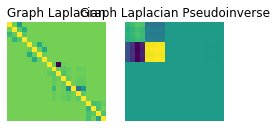

In [13]:
plt.subplot(1, 3, 1)
plt.imshow(l_sym)
plt.axis('off')
plt.title("Graph Laplacian")
plt.subplot(1, 3, 2)
plt.imshow(l_sym_inverse)
plt.axis('off')
plt.title("Graph Laplacian Pseudoinverse")
